# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import zipfile

# Importing the dataset

In [2]:
zip_file_path = 'vehicles.csv.zip'
csv_file_name = 'vehicles.csv'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(csv_file_name) as csv_file:
        df = pd.read_csv(csv_file)

In [3]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
df.shape

(426880, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## Notes:
#### 1- There are different data types most of it object
#### 2- There are  missing values in all columns except (id, url, region, region_url, price, state)

# ----------------------------------------------------------------------
# Dealing with missing values
### There are different ways to deal with missing values:
#### . Handling Numeric Data:
    ##### 1- Replace missing values with the mean, median, or mode of the column.
#### . Handling Categorical Data:
    ##### 1-  Replace missing values with the mode (most frequent value) of the column.
    ##### 2-  replace missing values by constant value.
#### . Dropping Missing Data:
    ##### 1- Drop Rows.
    ##### 2- Drop Columns.

#### Based on notes i will use these ways 

### I dropped the first 28 rows because most of the rows and columns have missing values and will affect the model

In [6]:
# Specify the range of indices to drop (e.g., from index 1 to 28 inclusive)
indices_to_drop = list(range(0, 27))

# Drop the specified rows
df.drop(indices_to_drop, inplace=True)

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
1,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
2,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
3,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
4,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


### Working on Categorical data

In [7]:
imputer_1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

columns_to_impute_1 = df.columns[5:11]
df[columns_to_impute_1] = imputer_1.fit_transform(df[columns_to_impute_1])

columns_to_impute_2 = df.columns[12:21]
df[columns_to_impute_2] = imputer_1.fit_transform(df[columns_to_impute_2])

# Impute missing values for single columns (reshape to 2D array)
df['state'] = imputer_1.fit_transform(df['state'].values.reshape(-1, 1))

df['posting_date'] = imputer_1.fit_transform(df['posting_date'].values.reshape(-1, 1))

In [8]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,full-size,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
1,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,full-size,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
2,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,full-size,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
3,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,full-size,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
4,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


### Working on Numeric data

In [9]:
# Specify the float columns to impute
float_columns_to_impute = ['year', 'odometer', 'lat', 'long']

# Create an imputer object with the strategy to impute missing values with the mean
imputer_2 = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply the imputer to the specified float columns
df[float_columns_to_impute] = imputer_2.fit_transform(df[float_columns_to_impute])

In [10]:
df.drop(columns=['county'], inplace=True)

In [11]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,4wd,full-size,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:18-0500
1,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:08-0500
2,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,4wd,full-size,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:25-0500
3,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,4wd,full-size,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T10:41:31-0500
4,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,2021-05-03T14:02:03-0500


### When predicting I would prefer Dropping id column, also the (url, region_url, image_url, posting_date, VIN, description, and ([lat, long] I do not need them for now and also have the state so it is enough)) columns athough i don't know if they are important for anything else 

In [12]:
# List of columns to drop
columns_to_drop = ['url', 'region_url', 'image_url', 'posting_date', 'VIN', 'description', 'lat', 'long']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,full-size,pickup,white,al
1,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,full-size,pickup,blue,al
2,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,full-size,pickup,red,al
3,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,full-size,pickup,red,al
4,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al


In [13]:
# Checking for duplicated rows in the dataset
df.duplicated().sum()

0

In [14]:
# Descriptive statistics of the dataset with styled background gradient
df.describe().style.background_gradient(cmap = "Purples")

,id,price,year,odometer
count,426853.000000,426853.000000,426853.000000,426853.000000
mean,7311492565.517877,75203.076122,2011.251100,98043.331443
std,4410556.305332,12182667.444300,9.443911,212783.097082
min,7207408119.000000,0.000000,1900.000000,0.000000
25%,7308144826.000000,5900.000000,2008.000000,38130.000000
50%,7312621578.000000,13950.000000,2013.000000,86596.000000
75%,7315253598.000000,26488.000000,2017.000000,133000.000000
max,7317101084.000000,3736928711.000000,2022.000000,10000000.000000


In [15]:
df.describe(include='object')

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
count,426853,426853,426853,426853,426853,426853,426853,426853,426853,426853,426853,426853,426853
unique,404,42,29667,6,8,5,6,3,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,4wd,full-size,sedan,white,ca
freq,3608,88604,13259,295533,271820,359195,413332,339053,262444,369799,179887,209461,50614


In [16]:
# check what every column have
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

id : 426853
7316814884    1
7313087211    1
7313399431    1
7313399796    1
7313402066    1
Name: id, dtype: int64

********************

region : 404
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
Name: region, dtype: int64

********************

price : 15655
0       32890
6995     3169
7995     3129
9995     2867
8995     2837
Name: price, dtype: int64

********************

year : 114
2017.0    37598
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
Name: year, dtype: int64

********************

manufacturer : 42
ford         88604
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
Name: manufacturer, dtype: int64

********************

model : 29667
f-150             13259
silverado 1500     5140
1500               4211
camry              3135
silverado          3023
Name: model, dtype: int64

********************

condition : 6
g

# EDA

## 1- What is the distribution of cars by region?

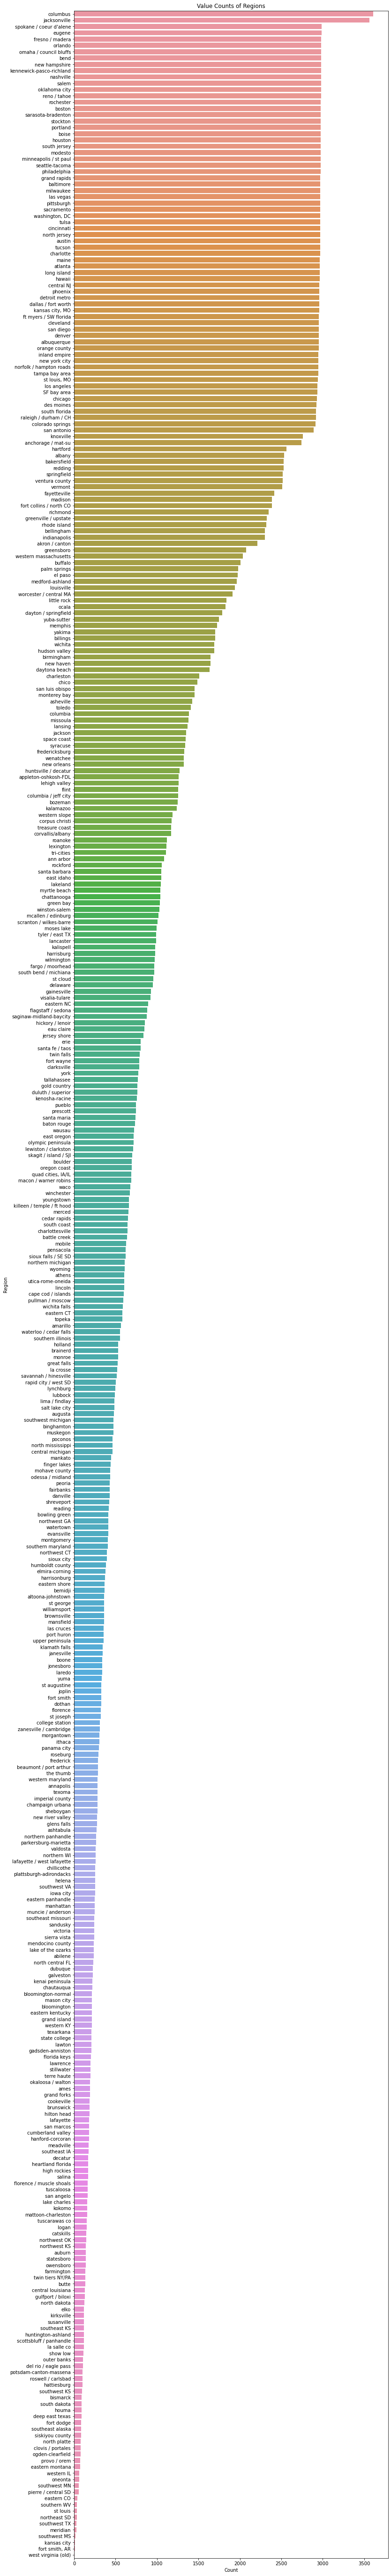

In [17]:
# Get the value counts
region_counts = df['region'].value_counts()

# Convert to DataFrame for Seaborn
region_counts_df = region_counts.reset_index()
region_counts_df.columns = ['region', 'count']

# Plot the data
plt.figure(figsize=(12, 100))
sns.barplot(x='count', y='region', data=region_counts_df)
plt.title('Value Counts of Regions')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

## 2- What is the average price of cars by region?

region
SF bay area               17038.890327
abilene                   42234.085106
akron / canton            92296.112619
albany                    20489.463540
albuquerque               18260.021680
                              ...     
york                      15981.758044
youngstown                52291.024096
yuba-sutter               14987.230681
yuma                      30356.585075
zanesville / cambridge    19432.623003
Name: price, Length: 404, dtype: float64


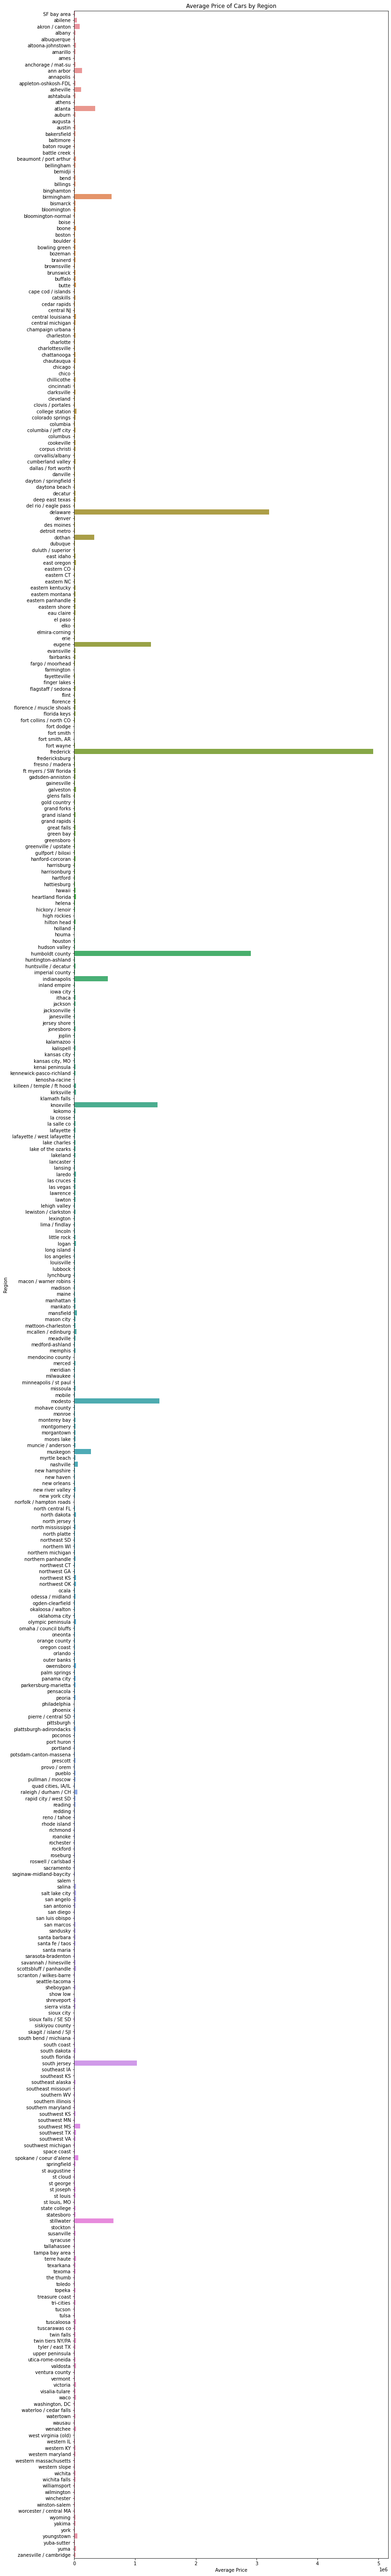

In [18]:
# 15. Average price of cars by region
average_price_by_region = df.groupby('region')['price'].mean()
print(average_price_by_region)
plt.figure(figsize=(12, 100))
sns.barplot(x=average_price_by_region.values, y=average_price_by_region.index)
plt.title('Average Price of Cars by Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

## 3- What is the distribution of cars by manufacturer?

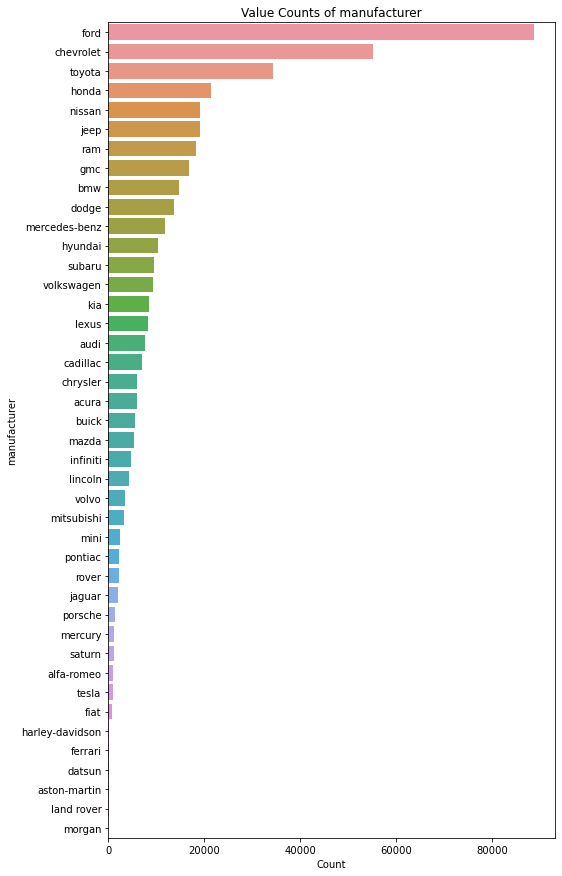

In [19]:
# Get the value counts
manufacturer_counts = df['manufacturer'].value_counts()

# Convert to DataFrame for Seaborn
manufacturer_counts_df = manufacturer_counts.reset_index()
manufacturer_counts_df.columns = ['manufacturer', 'count']

# Plot the data
plt.figure(figsize=(8, 15))
sns.barplot(x='count', y='manufacturer', data=manufacturer_counts_df)
plt.title('Value Counts of manufacturer')
plt.xlabel('Count')
plt.ylabel('manufacturer')
plt.show()

## 4- What is the average price of cars by manufacturer?

mercedes-benz


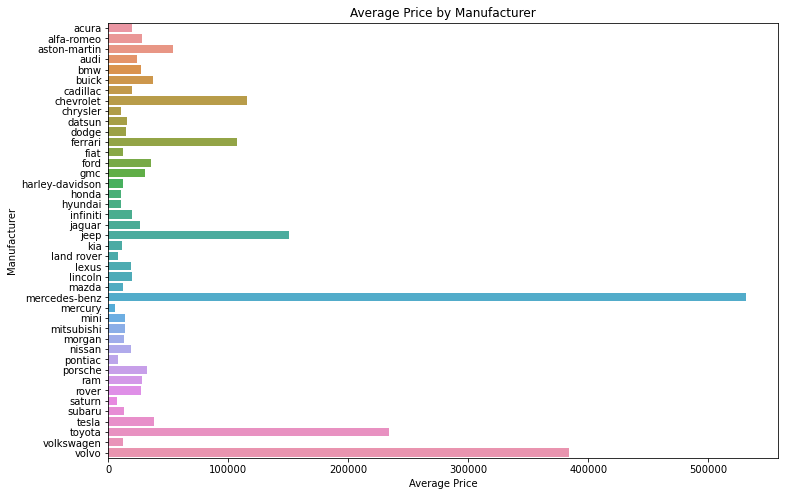

In [20]:
# 13. Manufacturer with the highest average price
average_price_by_manufacturer = df.groupby('manufacturer')['price'].mean()
highest_avg_price_manufacturer = average_price_by_manufacturer.idxmax()
print(highest_avg_price_manufacturer)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_by_manufacturer.values, y=average_price_by_manufacturer.index)
plt.title('Average Price by Manufacturer')
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.show()

## 5- What are the top 20 most frequent car models?
## 6- What is the average price of the top 20 most frequent car models?

In [21]:
df['model'].value_counts()

f-150                       13259
silverado 1500               5140
1500                         4211
camry                        3135
silverado                    3023
                            ...  
Huyndai Sante Fe Limited        1
astro awd 4x4                   1
escalade and                    1
cx 3                            1
Paige Glenbrook Touring         1
Name: model, Length: 29667, dtype: int64

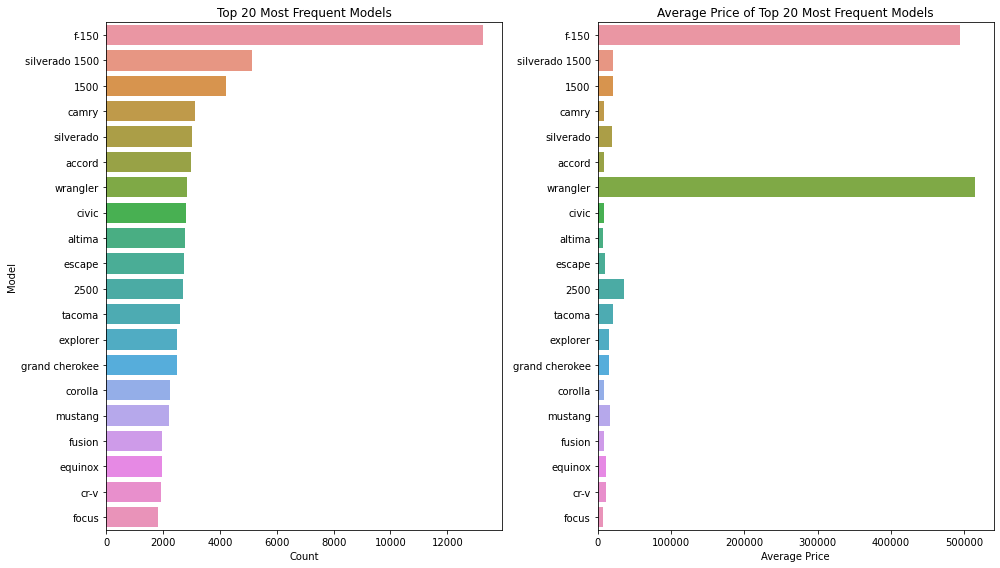

In [22]:
# Visualization by displaying only the most frequent models

# Get the value counts
model_counts = df['model'].value_counts()

# Convert to DataFrame for Seaborn
model_counts_df = model_counts.reset_index()
model_counts_df.columns = ['model', 'count']

# Sort by count in descending order and select the top 20
top_models_df = model_counts_df.head(20)

# Calculate the average price of the top 20 most frequent models
average_price_top_models = df[df['model'].isin(top_models_df['model'])].groupby('model')['price'].mean().reset_index()
average_price_top_models.columns = ['model', 'average_price']

# Merge the counts and average prices into one DataFrame
top_models_combined_df = pd.merge(top_models_df, average_price_top_models, on='model')

# Plot the data
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed

# Create the barplot for the counts
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='count', y='model', data=top_models_combined_df, ax=ax1)
ax1.set_title('Top 20 Most Frequent Models')
ax1.set_xlabel('Count')
ax1.set_ylabel('Model')

# Create the barplot for the average prices
ax2 = plt.subplot(1, 2, 2)
sns.barplot(x='average_price', y='model', data=top_models_combined_df, ax=ax2)
ax2.set_title('Average Price of Top 20 Most Frequent Models')
ax2.set_xlabel('Average Price')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

## 7- What is the distribution of cars by condition?

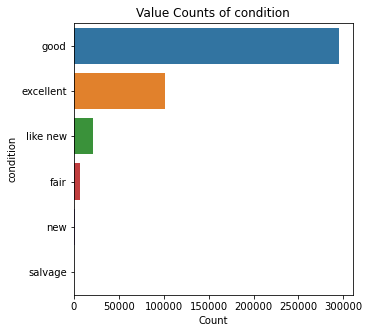

In [23]:
# Get the value counts
condition_counts = df['condition'].value_counts()

# Convert to DataFrame for Seaborn
condition_counts_df = condition_counts.reset_index()
condition_counts_df.columns = ['condition', 'count']

# Plot the data
plt.figure(figsize=(5, 5))
sns.barplot(x='count', y='condition', data=condition_counts_df)
plt.title('Value Counts of condition')
plt.xlabel('Count')
plt.ylabel('condition')
plt.show()

## 8- What is the average price of cars by condition?

condition
excellent     51346.825953
fair         761090.005614
good          70837.672649
like new      36402.041978
new           23657.266667
salvage        3605.534110
Name: price, dtype: float64


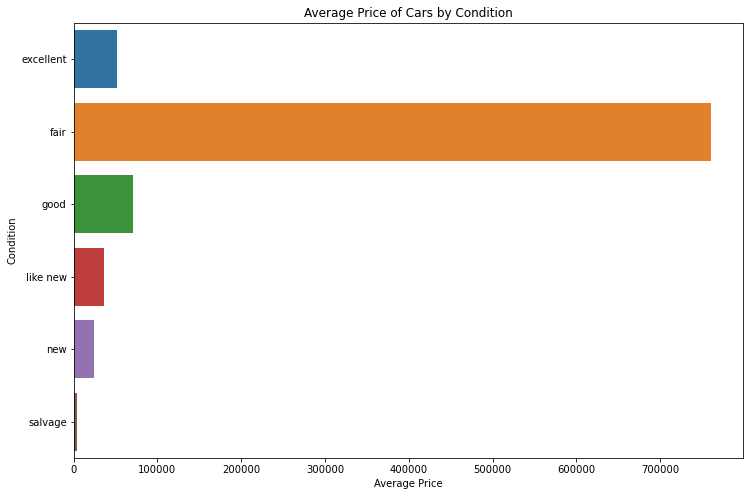

In [24]:
average_price_by_condition = df.groupby('condition')['price'].mean()
print(average_price_by_condition)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_by_condition.values, y=average_price_by_condition.index)
plt.title('Average Price of Cars by Condition')
plt.xlabel('Average Price')
plt.ylabel('Condition')
plt.show()

## 9- What is the distribution of cars by number of cylinders?

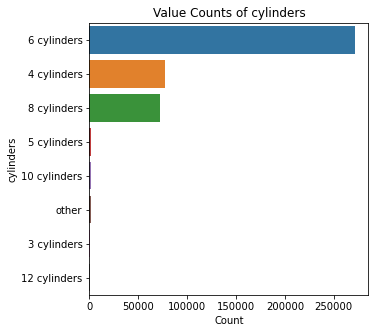

In [25]:
# Get the value counts
cylinders_counts = df['cylinders'].value_counts()

# Convert to DataFrame for Seaborn
cylinders_counts_df = cylinders_counts.reset_index()
cylinders_counts_df.columns = ['cylinders', 'count']

# Plot the data
plt.figure(figsize=(5, 5))
sns.barplot(x='count', y='cylinders', data=cylinders_counts_df)
plt.title('Value Counts of cylinders')
plt.xlabel('Count')
plt.ylabel('cylinders')
plt.show()

## 10- What is the average price of cars by number of cylinders?

cylinders
10 cylinders     21507.802062
12 cylinders     54299.382775
3 cylinders      12296.996947
4 cylinders      10545.301370
5 cylinders       7842.779790
6 cylinders      77757.415783
8 cylinders     139595.722142
other            17110.077812
Name: price, dtype: float64


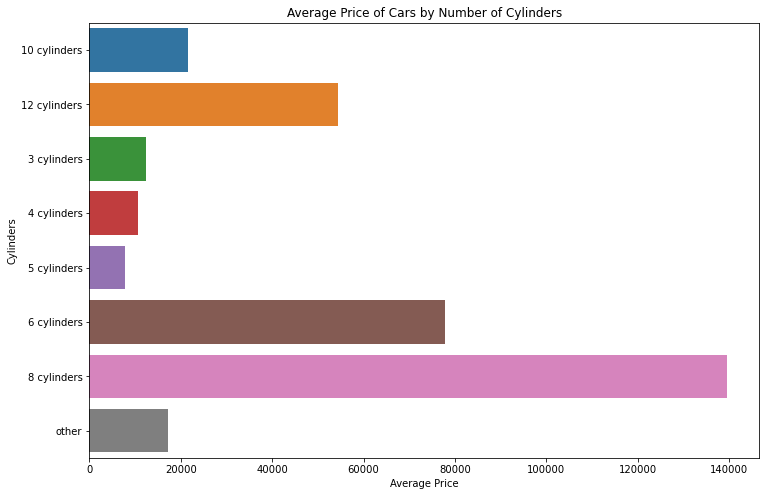

In [26]:
average_price_by_cylinders = df.groupby('cylinders')['price'].mean()
print(average_price_by_cylinders)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_by_cylinders.values, y=average_price_by_cylinders.index)
plt.title('Average Price of Cars by Number of Cylinders')
plt.xlabel('Average Price')
plt.ylabel('Cylinders')
plt.show()

## 11- What is the distribution of cars by fuel type?

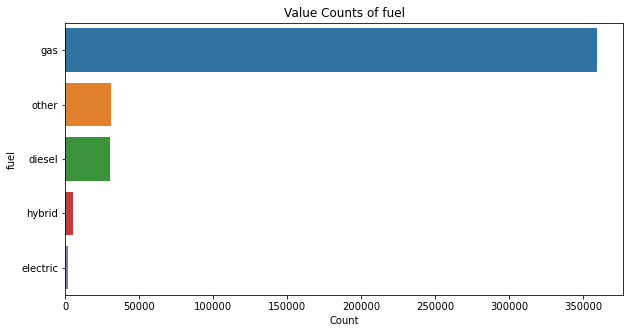

In [27]:
# Get the value counts
fuel_counts = df['fuel'].value_counts()

# Convert to DataFrame for Seaborn
fuel_counts_df = fuel_counts.reset_index()
fuel_counts_df.columns = ['fuel', 'count']

# Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='fuel', data=fuel_counts_df)
plt.title('Value Counts of fuel')
plt.xlabel('Count')
plt.ylabel('fuel')
plt.show()

## 12- What is the average price of cars by fuel type?

fuel
diesel      118177.693467
electric     24648.362191
gas          73435.810423
hybrid       14582.430948
other        66811.403899
Name: price, dtype: float64


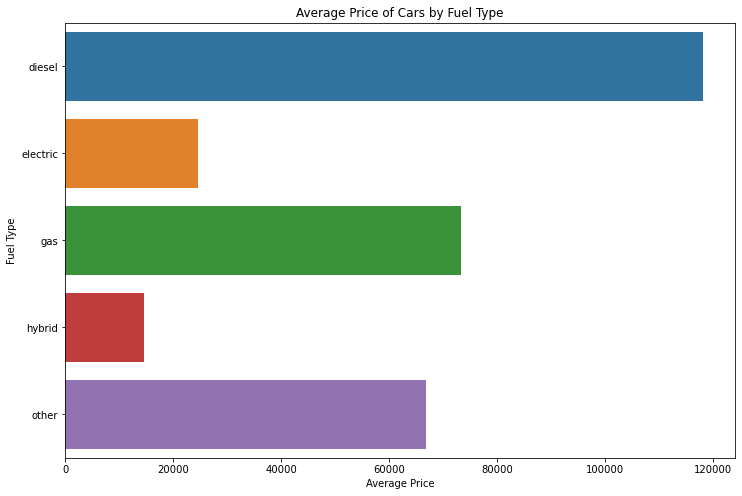

In [28]:
average_price_by_fuel = df.groupby('fuel')['price'].mean()
print(average_price_by_fuel)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_by_fuel.values, y=average_price_by_fuel.index)
plt.title('Average Price of Cars by Fuel Type')
plt.xlabel('Average Price')
plt.ylabel('Fuel Type')
plt.show()

## 13- What is the distribution of cars by title status?

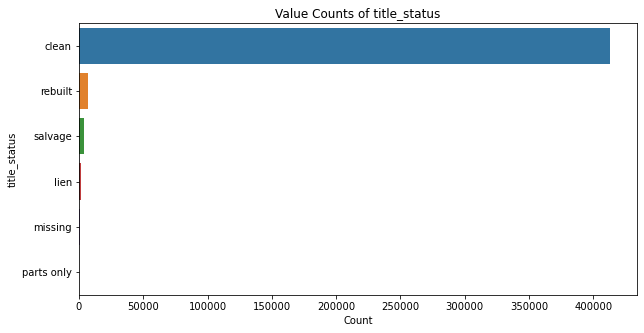

In [29]:
# Get the value counts
title_status_counts = df['title_status'].value_counts()

# Convert to DataFrame for Seaborn
title_status_counts_df = title_status_counts.reset_index()
title_status_counts_df.columns = ['title_status', 'count']

# Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='title_status', data=title_status_counts_df)
plt.title('Value Counts of title_status')
plt.xlabel('Count')
plt.ylabel('title_status')
plt.show()

## 14- What is the average price of cars by title status?

title_status
clean         77178.134495
lien          22424.004219
missing       21650.309582
parts only    11503.500000
rebuilt       15093.011913
salvage       10269.269131
Name: price, dtype: float64


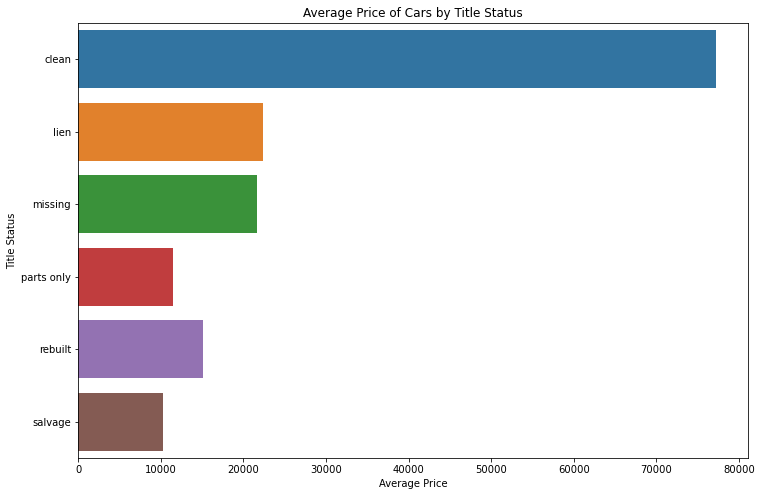

In [30]:
average_price_by_title_status = df.groupby('title_status')['price'].mean()
print(average_price_by_title_status)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_by_title_status.values, y=average_price_by_title_status.index)
plt.title('Average Price of Cars by Title Status')
plt.xlabel('Average Price')
plt.ylabel('Title Status')
plt.show()

## 15- What is the distribution of cars by transmission type?

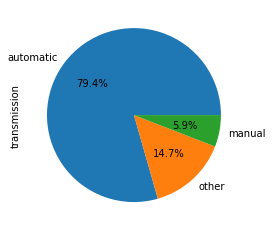

In [31]:
df['transmission'].value_counts().plot(kind='pie',autopct='%1.1f%%');

## 16- What is the average price of cars by transmission type?

transmission
automatic     74431.253078
manual       198416.336452
other         30003.788376
Name: price, dtype: float64


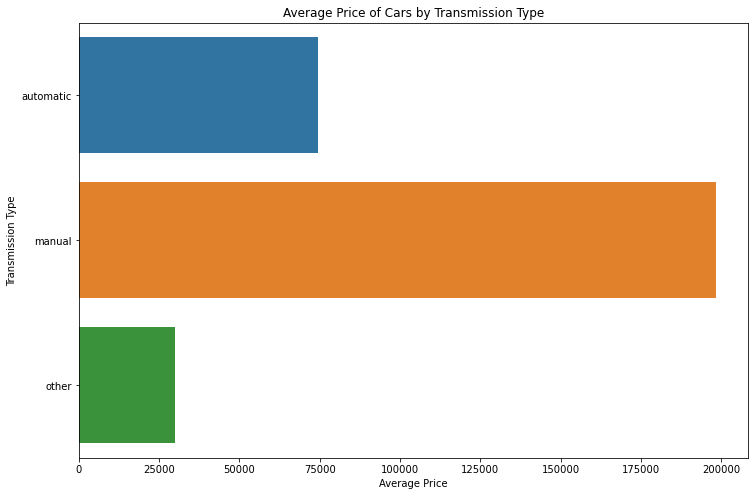

In [32]:
average_price_by_transmission = df.groupby('transmission')['price'].mean()
print(average_price_by_transmission)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_by_transmission.values, y=average_price_by_transmission.index)
plt.title('Average Price of Cars by Transmission Type')
plt.xlabel('Average Price')
plt.ylabel('Transmission Type')
plt.show()

## 17- What is the distribution of cars by type?

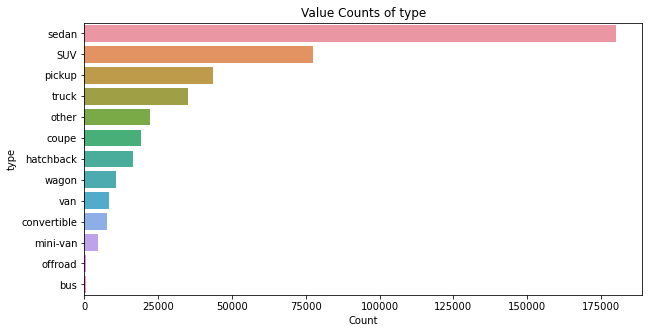

In [33]:
# Get the value counts
type_counts = df['type'].value_counts()

# Convert to DataFrame for Seaborn
type_counts_df = type_counts.reset_index()
type_counts_df.columns = ['type', 'count']

# Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='type', data=type_counts_df)
plt.title('Value Counts of type')
plt.xlabel('Count')
plt.ylabel('type')
plt.show()

## 18- What is the average price of cars by type?

type
SUV             34434.047552
bus             14105.617021
convertible     19999.774285
coupe           21937.563424
hatchback       14384.513375
mini-van         9234.087668
offroad         15813.093596
other           24743.587517
pickup         144751.639554
sedan          113344.930479
truck           29383.577993
van             17487.596748
wagon           13273.909683
Name: price, dtype: float64


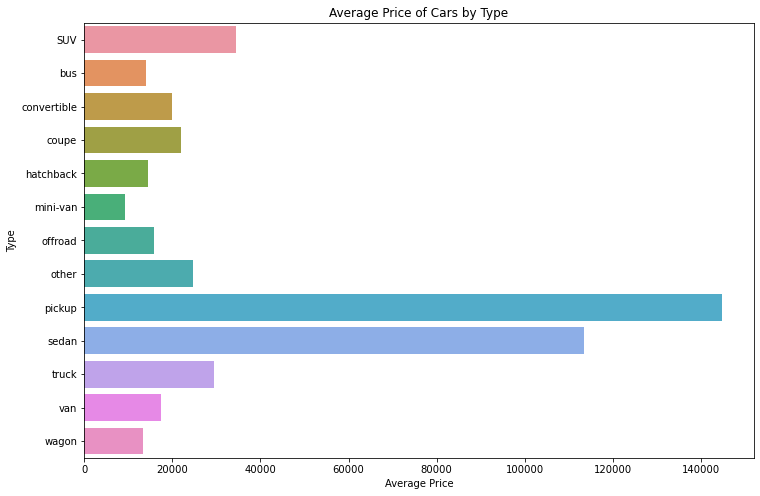

In [34]:
average_price_by_type = df.groupby('type')['price'].mean()
print(average_price_by_type)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_by_type.values, y=average_price_by_type.index)
plt.title('Average Price of Cars by Type')
plt.xlabel('Average Price')
plt.ylabel('Type')
plt.show()

## 19- What is the distribution of cars by paint color?

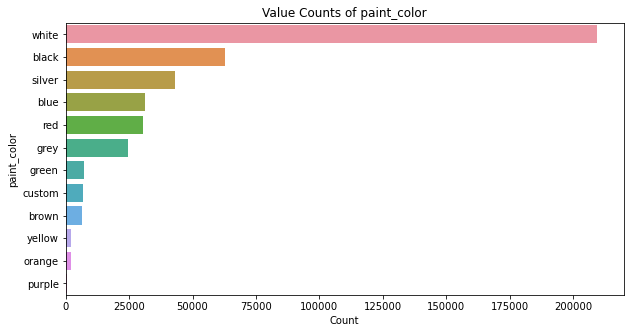

In [35]:
# Get the value counts
paint_color_counts = df['paint_color'].value_counts()

# Convert to DataFrame for Seaborn
paint_color_counts_df = paint_color_counts.reset_index()
paint_color_counts_df.columns = ['paint_color', 'count']

# Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='paint_color', data=paint_color_counts_df)
plt.title('Value Counts of paint_color')
plt.xlabel('Count')
plt.ylabel('paint_color')
plt.show()

## 20- Which paint color is most common for each car type?

In [36]:
common_paint_color_by_type = df.groupby('type')['paint_color'].agg(lambda x: x.value_counts().idxmax())
print(common_paint_color_by_type)

type
SUV            white
bus            white
convertible    white
coupe          white
hatchback      white
mini-van       white
offroad        black
other          white
pickup         white
sedan          white
truck          white
van            white
wagon          white
Name: paint_color, dtype: object


C:\Program Files\KMSpico\temp\ipykernel_12356\172414789.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="viridis",annot=True,linewidths=0.1)


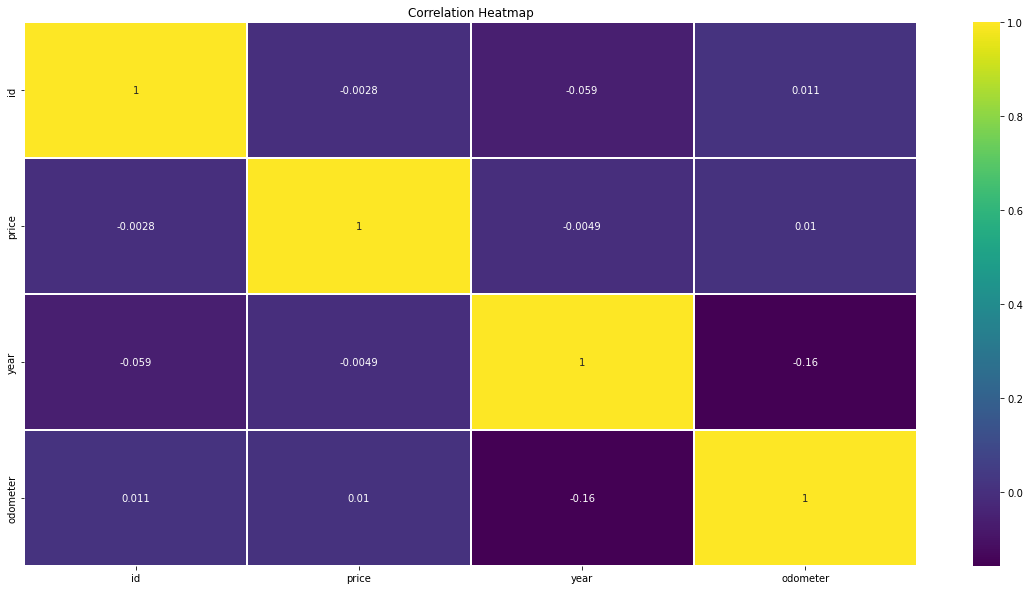

In [37]:
# Visualize the correlation between all features using a heatmap

plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), cmap="viridis",annot=True,linewidths=0.1) 
plt.title('Correlation Heatmap')
plt.show()